# **Contribution Checkpoints:**


A: Project idea - 5%


B: Dataset Curation and Preprocessing - 10%


C: Data Exploration and Summary Statistics - 10%


D: ML Algorithm Design/Development - 25%


E: ML Algorithm Training and Test Data Analysis - 20%


F: Visualization, Result Analysis, Conclusion - 15%


G: Final Tutorial Report Creation - 10%


H: Additional (not listed above, if any) - 5%


Member 1: Somil Varshney, Contribution: 90% (did not contribute to B)


Member 2: Sahil Raju Nilkanthache, Contribution: 85% (did not contribute to A, B)


Member 3: Rishi Modugu, Contribution: 85% (did not contribute to A, B)


Member 4: Elena Rangelov, Contribution: 95% (did not contribute to A) 


We, all team members, agree together that the above information is true, and we are confident about our contributions to this submitted project/final tutorial.
Somil Varshney 5/7/24
Sahil Raju Nilkanthache 5/7/24
Rishi Modugu 5/7/24
Elena Rangelov 5/7/24


- Somil Varshney: The Project idea was completely Somil's Idea. He presented 3 ideas to the group, and the group voted on Airbnbs in New York. He was the primary planner and leader so his name was all over the entire project. He was the quality control essentially for our group. He would make all final changes and tweaks before we submitted. Somil created the github repository and did the data curation with one hot encoding.
- Sahil Raju Nilkanthache: Sahil did the statistical method #3 and it's writeup. He also wrote the conclusion for checkpoint #2. Sahil wrote the introduction and conclusion of the final checkpoint.
- Rishi Modugu: Rishi did the statistical method #3 and it's writeup. Rishi wrote the Exploratory data analysis and the data curation of the final checkpoint.
- Elena Rangelov: The main facilitator of the data cleaning and did statistical method #1. Elena did the primary analysis of the final checkpoint.
The entire group came up with the idea to use change categorical data to numerical data in the data cleaning.




# Machine Learning-Based Pricing Model for Airbnbs in New York
## Spring 2024 Data Science Project


### Collaborators:
- Somil Varshney
- Sahil Raju Nilkanthache
- Rishi Modugu
- Elena Rangelov




## Dataset
**Source:** https://www.kaggle.com/datasets/manjitbaishya001/airbnb-new-york-jan-2024?select=detailed_reviews.csv, sourced from Airbnb

**Description:** Airbnb data from New York focusing on listings, locations, and user reviews of locations. This dataset includes the reviews for each Airbnb as well as other features like price. Features like neighbourhood group and neighbourhood can be used to estimate the price ranges for certain areas. The type of Airbnb (Rental Unit, Loft, etc.) can also be used to estimate the price. These are the most important features for formulating a pricing model, which is the goal of this project. We also anonymized the data by stripping the names and instead identifying the host based on the host id.


## Reason for choosing dataset
We chose this topic to find answers for several common perceptions about Airbnb listings and whether those conclusions are justified.

These include questions like:
- **Location Preferences:** By analyzing review sentiments and ratings across different neighborhoods in New York City, the model identifies which areas are most profitable. This information can be valuable for both hosts and guests in making decisions about where to stay or where to list their properties.
- **Price Sensitivity:** Analyzing the relationship between listing prices and review scores can reveal whether guests perceive higher-priced listings as offering better value or if they are more critical of expensive properties. This information can help hosts optimize their pricing strategies.
- **Competitive Analysis:** Comparing review data across different Airbnb listings can help hosts benchmark their performance against competitors and identify areas for improvement. This can include aspects such as pricing, amenities, and overall guest experience.


Our focus is on maximizing profits for hosts and analyzing best deals for guests when traveling. For hosts in New York, we want them to be able to enter their features of their Airbnb and get an estimate as to what price they should charge or pay. Answering the questions above is important because it can save our users money when planning trips to an already very expensive area in New York.

# **Data Preprocessing**

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# importing dataset and organizing
listings_df = pd.read_csv("./dataset/listings.csv")

# dropping all listings with a NA price as the percentage of NAs is more than 5%
# and imputation on a feature as complex as a listing price seems unnecessary
# given the quanitity of listings that do have an associated price
listings_df = listings_df.dropna(subset=['price'])

# all values are in the correct format
print("Data Types: ", list(listings_df.dtypes))


print(3*"\n", "Dataframe:")

listings_df.head()

Data Types:  [dtype('int64'), dtype('O'), dtype('int64'), dtype('O'), dtype('O'), dtype('O'), dtype('float64'), dtype('float64'), dtype('O'), dtype('float64'), dtype('int64'), dtype('int64'), dtype('O'), dtype('float64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('O')]



 Dataframe:


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
1,743430766348459803,Rental unit in Brooklyn · 1 bedroom · 1 bed · ...,83422715,D,Brooklyn,Flatbush,40.65375,-73.95502,Entire home/apt,289.0,30,0,NaN,NaN,1,365,0,NaN
6,11943,Home in Brooklyn · 1 bedroom · 2 beds · 1 bath,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150.0,30,0,NaN,NaN,1,0,0,NaN
8,1312228,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.68371,-73.96461,Private room,55.0,30,3,2015-12-20,0.03,1,0,0,NaN
24,13440481,Rental unit in New York · 1 bedroom · 1 bed · ...,17385374,Dennis J.,Manhattan,Upper East Side,40.76550,-73.97080,Private room,301.0,30,0,NaN,NaN,1,0,0,NaN
28,45277537,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.76661,-73.98810,Entire home/apt,144.0,30,9,2023-05-01,0.24,139,364,2,NaN


In [31]:
listings_df.drop(["license", "last_review", "id", "host_name", "name"], axis=1, inplace=True)
print(listings_df.size, (listings_df.dropna()).size)
listings_df = listings_df.dropna()

378183 269854


## What We Dropped and Why

We dropped the "license", "last_review", "id", and "host_name" columns.
- License: 90% of the data did not have a license, so when we dropped NAs, it would leave us with 50k users instead of 500k.
- Last Review: There were a ton of NAs, but also we did not need this column for any analysis.
- ID: Since every ID is unique, there is nothing we can do with it. We have row numbers instead.
- Host Name: We wanted to anonymize the data, but also we have host_id which is numerical and allows to easily search for it.

In [32]:
encoded_data = listings_df.copy(deep=True) 
list_cols_to_encode = ["neighbourhood_group", "neighbourhood", "room_type"] 
for i in list_cols_to_encode: 
    encoded_data[i] = encoded_data[i].replace(encoded_data[i].unique(), [j for j in range(len(encoded_data[i].unique()))]) 
    
encoded_data.head()

C:\Users\elena\AppData\Local\Temp\ipykernel_23548\316468969.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  encoded_data[i] = encoded_data[i].replace(encoded_data[i].unique(), [j for j in range(len(encoded_data[i].unique()))])


,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
8,7130382,0,0,40.683710,-73.964610,0,55.0,30,3,0.03,1,0,0
28,51501835,1,1,40.766610,-73.988100,1,144.0,30,9,0.24,139,364,2
38,528871354,1,2,40.750764,-73.994605,1,187.0,2,6,1.67,1,343,6
40,19902271,1,3,40.835600,-73.942500,0,120.0,30,156,1.38,2,363,12
45,61391963,1,4,40.751120,-73.978600,1,85.0,30,11,0.24,133,335,3


# **Data exploration and summary statistics**

## **Statistical Method #1**

**Null Hypothesis ($H_{0}$) :** The neighborhood group of the Airbnb does not have a statistically significant impact on the availability for the Airbnb.

**Alternative Hypothesis ($H_{a}$) :** The neighborhood group of the Airbnb has a statistically significant impact on the availability for the Airbnb.

**Alpha-Value ($a$) :** 0.05

**Confidence level:** 95%

Kruskal-Wallis Test Statistic: 112.97208443868276
P-Value: 1.6903863188481304e-23
neighbourhood_group
Bronx            237.586934
Staten Island    232.350515
Queens           212.205796
Manhattan        203.919134
Brooklyn         200.240316
Name: availability_365, dtype: float64


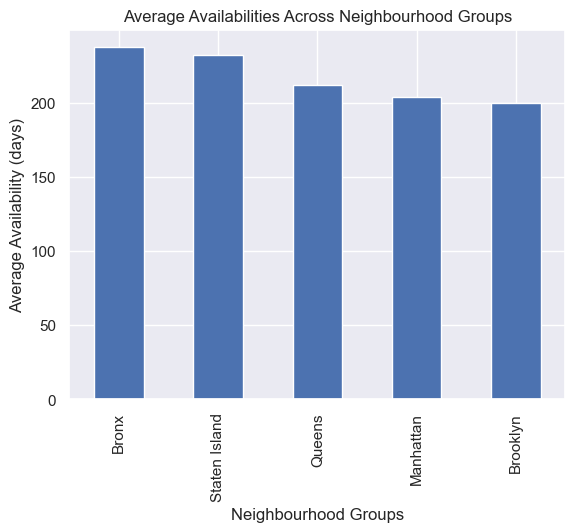

In [33]:
import numpy as np
from scipy.stats import kruskal

# Group by neighborhood group and calculate mean availability
df_groups = listings_df.groupby('neighbourhood_group')['availability_365'].mean().sort_values(ascending=False)

# Convert mean availability to a list
mean_availability = df_groups.tolist()

# Perform Kruskal-Wallis test to compare mean availability across neighborhood groups
statistic, p = kruskal(*[listings_df[listings_df['neighbourhood_group'] == group]['availability_365'] for group in df_groups.index])

print("Kruskal-Wallis Test Statistic:", statistic)
print("P-Value:", p)
print(df_groups)

# Plotting the graph
df_groups.plot.bar()
plt.ylabel('Average Availability (days)')
plt.xlabel('Neighbourhood Groups')
plt.title('Average Availabilities Across Neighbourhood Groups')
plt.show()

Since the p-value is lower than the confidence interval, we can reject the null hypothesis. This means that the location has a statistically significant impact on the availability for the Airbnb. The most available Airbnbs are located in Staten Island, and the least available Airbnbs are in Brooklyn.

This is important for the machine learning model because the model should take into account that there are disproportionate availabilities based on the location of the Airbnb. The pricing model will weigh this as well.

## **Statistical Method #2**

**Null Hypothesis ($H_{0}$) :** The neighbourhoods in Manhattan do not have a statistically significant impact on the mean prices for Entire home/apt units.

**Alternative Hypothesis ($H_{a}$) :** The neighbourhoods in Manhattan have a statistically significant impact on the mean prices for Entire home/apt units.

**Alpha-Value ($a$) :** 0.05

**Confidence level:** 95%

P-Value: 2.596647049069326e-29


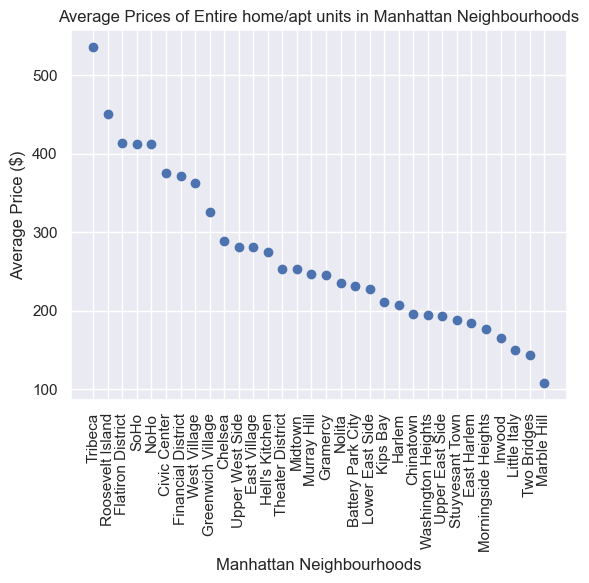

In [34]:
from scipy.stats import f_oneway

# Filter the dataset to include only listings in Manhattan with 'Entire home/apt' room type
df_manhattan = listings_df[(listings_df['neighbourhood_group'] == 'Manhattan') & (listings_df['room_type'] == 'Entire home/apt')]

# Group by neighborhood and calculate mean prices for 'Entire home/apt' units
df_groups = df_manhattan.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)
mean_prices = list(df_groups)

# Perform one-way ANOVA test to test for statistically significant differences between the mean prices of neighborhoods
statistic, p = f_oneway(*[df_manhattan[df_manhattan['neighbourhood'] == neighborhood]['price'] for neighborhood in df_groups.index])

print("P-Value:", p)

# Plot the scatter plot
plt.scatter(df_groups.index, mean_prices)
plt.xticks(rotation=90)
plt.ylabel('Average Price ($)')
plt.xlabel('Manhattan Neighbourhoods')
plt.title('Average Prices of Entire home/apt units in Manhattan Neighbourhoods')
plt.show()

As the p-value (7.9997e-22) is less than the alpha value of 0.05, we can reject the null hypothesis and conclude that there is a significant difference in the prices of Entire home/apt units between Manhattan neighbourhoods. Tribeca is the most expensive location in Manhattan based on the data provided/present for entire home/apts, with an average price of approximately $595. These findings allude to the fact that New York's neighbourhood groups have a varying price range of entire home/apt units throught their neighbourhoods.

## **Statistical Method #3**

**Null Hypothesis ($H_{0}$) :** The number of reviews of an Airbnb does not have a statistically significant impact on the price of the Airbnb.

**Alternative Hypothesis ($H_{a}$) :** The number of reviews of an Airbnb has a statistically significant impact on the price of the Airbnb.

**Alpha-Value ($a$) :** 0.05

**Confidence level:** 95%

T-statistic: 4.804976232204855
P-value: 1.5585135406409729e-06


C:\Users\elena\AppData\Local\Temp\ipykernel_23548\3507438044.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=new_df, x="price", y="number_of_reviews", linewidth = 0.5, palette="mako_r", alpha=1)


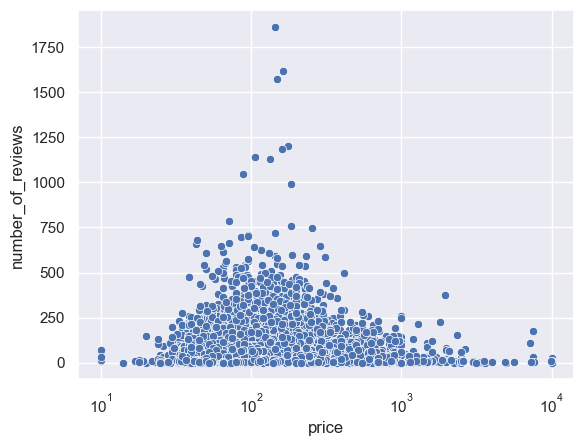

In [35]:
# using a threshold that listings with a number of reviews of lesser than 50 is
# regarded as 'Low' number of reviews and those with higher than 50 is regarded
# as 'High' number of reviews.

# taking out outliers (only 7 listings have prices higher than 19000 and may
# ruin integrity of our dataset)
new_df = listings_df[listings_df["price"] < 19000.0]

low_df = new_df[new_df['number_of_reviews'] < 50]
high_df = new_df[new_df['number_of_reviews'] >= 50]

low_prices = low_df['price']
high_prices = high_df['price']

t_statistic, p_value = stats.ttest_ind(low_prices, high_prices)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

# plotting the graph
sns.scatterplot(data=new_df, x="price", y="number_of_reviews", linewidth = 0.5, palette="mako_r", alpha=1)
plt.xscale('log')


The p-value of 1.444e-17 is extremely small, indicating strong evidence against the null hypothesis.

Given the very small p-value, much smaller than the typical significance level of 0.05, we reject the null hypothesis. Therefore, we conclude that there is a statistically significant difference in mean prices between the low and high review groups.

If there's a significant difference in mean prices between listings with low and high review counts, this finding could have implications for pricing strategy. For example, it might suggest that listings with higher review counts can command higher prices, potentially reflecting greater perceived value among customers.

# **Initial Conclusions through Exploratory Analysis**

Through our exploratory data analysis and basic data cleaning (the data was pretty clean to begin with) we hope to build a machine learning model to predict the price of Airbnb listings based on features such as location, property type, number of bedrooms, amenities, and historical booking data. This could help hosts optimize their pricing strategy and maximize their revenue.

Through our aforementioned Hypothesis Testing, we have found correlatory evidence in features provided in the dataset and being able to predict the value of a listing. This provides a positive outlook onto being able to create a Machine Learning pricing model in the future.

### imports


In [124]:
import os
import tarfile
import requests
import torch
from torch.utils.data import Dataset
import pandas as pd
import cv2
import os
import torch.nn as nn
import torch.nn.functional as F
import math
import tqdm
import copy
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from scipy import stats


### model definition


In [125]:
#

class Net(nn.Module):
  def __init__(self, n_classes):
    super().__init__()

    self.conv = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=4, stride=1, padding=1)

    self.fc1 = nn.Linear(8 * 6 * 7, n_classes)
    self.fc2 = nn.Linear(n_classes, 1)

  def forward(self, x):
    x = x.unsqueeze(1)
    x = self.conv(x)
    x = F.relu(x)
    x = x.view(x.size(0), -1)

    x = self.fc1(x)
    x = F.relu(x)
    x = self.fc2(x)
    return x


model = nn.Sequential(
    nn.Linear(12, 48),
    nn.ReLU(),
    nn.Linear(48, 24),
    nn.ReLU(),
    nn.Linear(24, 12),
    nn.ReLU(),
    nn.Linear(12, 6),
    nn.ReLU(),
    nn.Linear(6, 1)
).float()

In [126]:
n_epochs = 100
batch_size = 10

### train model using train and validation datasets

In [127]:
# loss function and optimizer
loss_fn = nn.MSELoss()  # mean square error
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# # train-test split of the dataset
# X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, shuffle=True)
# X_train = torch.tensor(X_train, dtype=torch.float32)
# y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
# X_test = torch.tensor(X_test, dtype=torch.float32)
# y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

train_size = int(0.8 * len(encoded_data))
test_size = int(0.1 * len(encoded_data) + 1)
val_size = int(0.1 * len(encoded_data) + 1)


train_set, test_set, val_set = torch.utils.data.random_split(encoded_data, [train_size, test_size, val_size])

x_train = encoded_data.iloc[list(train_set.indices)]
y_train = x_train['price'].values.reshape(-1, 1)
x_train = x_train.drop('price', axis=1).to_numpy().astype(float)

x_test = encoded_data.iloc[list(test_set.indices)]
y_test = x_test['price'].values.reshape(-1, 1)
x_test = x_test.drop('price', axis=1).to_numpy().astype(float)

x_val = encoded_data.iloc[list(val_set.indices)]
y_val = x_val['price'].values.reshape(-1, 1)
x_val = x_val.drop('price', axis=1).to_numpy().astype(float)

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_val = scaler.transform(x_val)

scaler2 = MinMaxScaler()
y_train = scaler2.fit_transform(y_train)
y_test = scaler2.transform(y_test)
y_val = scaler2.transform(y_val)

y_train = [item[0] for item in y_train]
y_val = [item[0] for item in y_val]
y_test = [item[0] for item in y_test]

x_train = torch.tensor(x_train, dtype=torch.float32)
x_test = torch.tensor(x_test, dtype=torch.float32)
x_val = torch.tensor(x_val, dtype=torch.float32)

y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)

# Hold the best model
best_mse = np.inf   # init to infinity
best_model = None
mse_store = []
loss_store = []
eval_epochs = 0
batch_start = torch.arange(0, len(x_train), batch_size)

# training loop
for epoch in range(n_epochs):

    model.train()

    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")

        for start in bar:

            # take a batch
            X_batch = x_train[start:start+batch_size].float()
            y_batch = y_train[start:start+batch_size].float()


            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)

            # backward pass
            optimizer.zero_grad()
            loss.backward()

            # update weights
            optimizer.step()

            # print progress
            bar.set_postfix(mse=float(loss))

    # evaluate accuracy at end of each epoch
    model.eval()
    y_pred = model(x_val)

    eval_epochs += 1

    mse = loss_fn(y_pred, y_val)

    mse = float(mse)
    mse_store.append(mse)
    loss_store.append(loss.item())

    print(f"Epoch: {epoch}, Train Loss: {loss.item()} Eval Loss: {mse}")

    if mse < best_mse:
        best_mse = mse
        best_model = copy.deepcopy(model.state_dict())

# Save your model's weights
model.load_state_dict(best_model)
torch.save(model.state_dict(), "model.pth")

c:\Users\elena\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\elena\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([6])) that is different to the input size (torch.Size([6, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\elena\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([2076])) that is different to the input size (torch.Size([2076, 1])). This will likely lead to inc

Epoch: 0, Train Loss: 1.5310142771340907e-06 Eval Loss: 8.893225640349556e-06
Epoch: 1, Train Loss: 1.444228587388352e-06 Eval Loss: 8.865144081937615e-06
Epoch: 2, Train Loss: 1.4562306205334608e-06 Eval Loss: 8.856274689605925e-06
Epoch: 3, Train Loss: 1.4405407000595005e-06 Eval Loss: 8.849819096212741e-06
Epoch: 4, Train Loss: 1.4424359733311576e-06 Eval Loss: 8.847360732033849e-06
Epoch: 5, Train Loss: 1.4361888815983548e-06 Eval Loss: 8.84509427123703e-06
Epoch: 6, Train Loss: 1.4375259524967987e-06 Eval Loss: 8.84315977600636e-06
Epoch: 7, Train Loss: 1.4251513675844762e-06 Eval Loss: 8.841931958158966e-06
Epoch: 8, Train Loss: 1.4170012718750513e-06 Eval Loss: 8.841408998705447e-06
Epoch: 9, Train Loss: 1.4048914636077825e-06 Eval Loss: 8.84156997926766e-06
Epoch: 10, Train Loss: 1.4009182223162497e-06 Eval Loss: 8.839729161991272e-06
Epoch: 11, Train Loss: 1.4267333199313725e-06 Eval Loss: 8.839022484607995e-06
Epoch: 12, Train Loss: 1.4066853282201919e-06 Eval Loss: 8.8386896

KeyboardInterrupt: 

### plot training and eval loss values




In [ ]:
# restore model and return best accuracy
model.load_state_dict(best_model)

<All keys matched successfully>

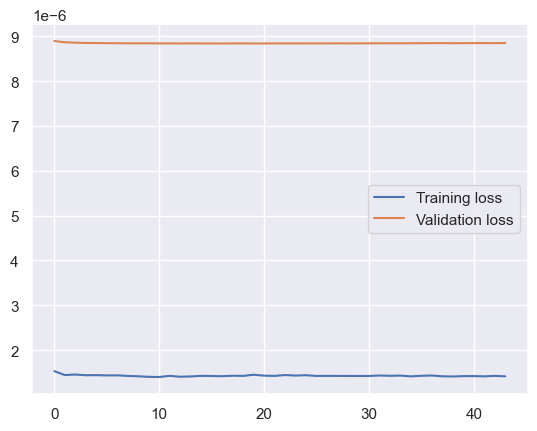

In [128]:
# Plot the training and validation loss
plt.plot(range(eval_epochs), loss_store, label='Training loss')
plt.plot(range(eval_epochs), mse_store, label='Validation loss')
plt.legend()
plt.show()

# testing model on test set


In [129]:
# Load from your saved model using torch.load
# model_state_dict = torch.load("./model.pth")
# model.load_state_dict(model_state_dict)

# set model to inference mode
model.eval()
batch_size = 1
preds = []

test_loader = DataLoader(x_test, batch_size=batch_size, shuffle=False)


with torch.no_grad():

  for x in tqdm.tqdm(test_loader):

    y_pred = model(x)

    preds.append(y_pred)


# Get the true labels for the validation dataset
# true_y = torch.tensor(y_test)
preds = torch.tensor(preds)


mse_loss = nn.MSELoss()
mse = mse_loss(preds, y_test)
print(f"mse: {mse}")

100%|██████████| 2076/2076 [00:00<00:00, 9285.66it/s]

mse: 1.2930062439409085e-05


# **Insights and Conclusions**:

Through our analysis and price modeling, we found that there was a high correlation between the neighbourhood and neighbourhood groups where the Airbnb was listed and the price of the listing. Through this, we can observe that throughout New York City, certain neighbourhood/neighbourhood groups have more expensive listings and Airbnbs than some other neighbourhoods. For example, when comparing Manhattan neighbourhoods, we found that there were significant differences, with Tribeca having an average listing of approximately 600 whereas Marble Hill has an average listing of approximately 100. In addition, we were able to conclude that there was a correlation between the number of reviews on the listing and the price of the listing. This is interesting because it has several meanings in the context of Airbnbs. For example, if users are especially discontent with an Airbnb, there could be more reviews expressing their negative opinions with negative feelings being stronger than positive feelings (Negativity bias). In contrast, an exceptional Airbnb could elicit more positive reviews expressing their positive opinions about the Airbnb. Alas, with an existing correlation with the price, this feature was a viable aspect to consider when constructing the model. Another feature we explored was the availability between neighbourhood groups. Once again, we discovered a correlation strong enough to reject the null hypothesis. With the disproportionate availablities between neighbourhood groups, this was another feature that would benefit the model. The price model that we have formulated produces a price estimate based on the features, location, etc. of the Airbnb, which can help hosts determine the optimal price for the Airbnb they are listing. Of course, there may be more factors to consider when determining the price of an Airbnb, but our model hopes to provide a benchmark to aid hosts trying to accurately value an Airbnb.